In [98]:
import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
from skimage.io import imread
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
train_folder = 'chest_xray/train'
test_folder = 'chest_xray/val'
val_folder = 'chest_xray/test'

In [32]:
train_n_folder = 'chest_xray/train/NORMAL'
train_p_folder = 'chest_xray/train/PNEUMONIA'
test_n_folder = 'chest_xray/val/NORMAL'
test_p_folder = 'chest_xray/val/PNEUMONIA'
val_n_folder = 'chest_xray/test/NORMAL'
val_p_folder = 'chest_xray/test/PNEUMONIA'

Store all image names

In [33]:
train_n = [file for file in os.listdir(train_n_folder) if file.endswith('.jpeg')]
train_p = [file for file in os.listdir(train_p_folder) if file.endswith('.jpeg')]

In [34]:
test_n = [file for file in os.listdir(test_n_folder) if file.endswith('.jpeg')]
test_p = [file for file in os.listdir(test_p_folder) if file.endswith('.jpeg')]

In [35]:
val_n = [file for file in os.listdir(val_n_folder) if file.endswith('.jpeg')]
val_p = [file for file in os.listdir(val_p_folder) if file.endswith('.jpeg')]

Image Processing

In [36]:
len(train_n) + len(train_p)

5216

In [37]:
# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size= 5216)

Found 5216 images belonging to 2 classes.


In [38]:
len(test_n) + len(test_p)

16

In [39]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 16)

Found 16 images belonging to 2 classes.


In [40]:
len(val_n) + len(val_p)

624

In [41]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 624) 

Found 624 images belonging to 2 classes.


Create the datasets

In [42]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

reshape

In [43]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [44]:
print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 12288)
(16, 12288)
(624, 12288)


In [45]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (16,1))
val_y = np.reshape(val_labels[:,0], (624,1))

First Model

In [46]:
first_model = models.Sequential()
first_model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
first_model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
first_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
first_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                245780    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 245,801
Trainable params: 245,801
Non-trainable params: 0
_________________________________________________________________


In [125]:
result_first = first_model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9735 - val_loss: 0.9796 - val_accuracy: 0.7612
Epoch 2/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0822 - accuracy: 0.9695 - val_loss: 0.9989 - val_accuracy: 0.7548
Epoch 3/50
163/163 [==============================] - 1s 7ms/step - loss: 0.0874 - accuracy: 0.9686 - val_loss: 0.9434 - val_accuracy: 0.7612
Epoch 4/50
163/163 [==============================] - 1s 6ms/step - loss: 0.0706 - accuracy: 0.9753 - val_loss: 1.1317 - val_accuracy: 0.7292
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9747 - val_loss: 0.6335 - val_accuracy: 0.8061
Epoch 6/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9739 - val_loss: 1.0818 - val_accuracy: 0.7404
Epoch 7/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0756 - accuracy: 0.9726 - val_loss: 0.7414 - val_accuracy: 0.7981
Epoch 

Visualize Loss and Accuracy Score

In [50]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

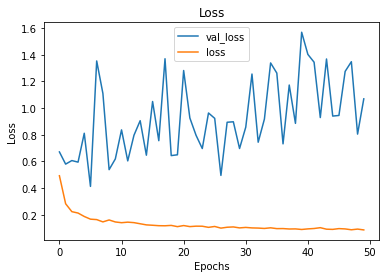

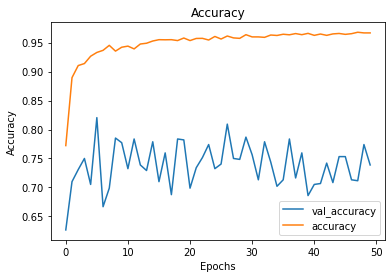

In [51]:
visualize_training_results(result_first)

In [62]:
first_results_train = first_model.evaluate(train_img, train_y)
first_results_val = first_model.evaluate(val_img, val_y)
print(first_results_train)
print(first_results_val)

20/20 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.7388
[0.07425756752490997, 0.9727760553359985]
[1.0694044828414917, 0.7387820482254028]


Second Model

In [63]:
second_model = models.Sequential()
second_model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
second_model.add(layers.Dense(7, activation='relu'))
second_model.add(layers.Dense(5, activation='relu'))
second_model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
second_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
second_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                245780    
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________


In [66]:
result_second = second_model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7431 - val_loss: 0.7310 - val_accuracy: 0.6250
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8363 - val_loss: 0.5084 - val_accuracy: 0.7484
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.9026 - val_loss: 0.6708 - val_accuracy: 0.7019
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.8988 - val_loss: 0.8058 - val_accuracy: 0.6955
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.2210 - accuracy: 0.9114 - val_loss: 0.6601 - val_accuracy: 0.7388
Epoch 6/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1944 - accuracy: 0.9250 - val_loss: 0.5483 - val_accuracy: 0.7724
Epoch 7/50
163/163 [==============================] - 1s 5ms/step - loss: 0.1779 - accuracy: 0.9306 - val_loss: 0.5611 - val_accuracy: 0.7821
Epoch 

Visualize Loss and Accuracy Scores

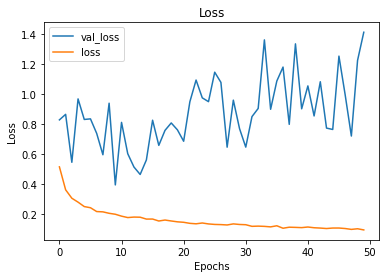

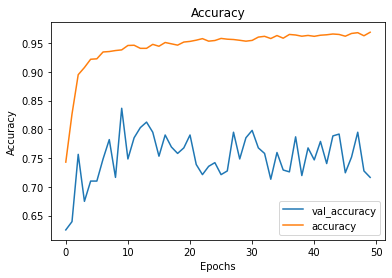

In [67]:
visualize_training_results(result_baseline)

In [68]:
second_results_train = baseline_model.evaluate(train_img, train_y)
second_results_val = baseline_model.evaluate(val_img, val_y)

print(first_results_train)
print(first_results_val)
print(second_results_train)
print(second_results_val)

20/20 [==============================] - 0s 2ms/step - loss: 1.4114 - accuracy: 0.7163
[0.07425756752490997, 0.9727760553359985]
[1.0694044828414917, 0.7387820482254028]
[0.10120843350887299, 0.9651073813438416]
[1.4114489555358887, 0.7163461446762085]


Early Stopping

In [117]:
estop_model = models.Sequential()
estop_model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
estop_model.add(layers.Dense(1, activation='sigmoid'))

In [118]:
estop_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [119]:
# Import EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [120]:
result_first = first_model.fit(train_img,
                    train_y,
                    epochs=50,
                    callbacks=early_stopping,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 1s 6ms/step - loss: 0.0832 - accuracy: 0.9695 - val_loss: 0.9872 - val_accuracy: 0.7516
Epoch 2/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9689 - val_loss: 1.2144 - val_accuracy: 0.7212
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9680 - val_loss: 0.7671 - val_accuracy: 0.7853
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9672 - val_loss: 0.5732 - val_accuracy: 0.8077
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0851 - accuracy: 0.9661 - val_loss: 1.0105 - val_accuracy: 0.7436
Epoch 6/50
163/163 [==============================] - 1s 5ms/step - loss: 0.0866 - accuracy: 0.9668 - val_loss: 1.0104 - val_accuracy: 0.7436
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9699 - val_loss: 0.7685 - val_accuracy: 0.7869
Epoch 

In [121]:
estop_results_train = estop_model.evaluate(train_img, train_y)
estop_results_val = estop_model.evaluate(val_img, val_y)

print(first_results_train)
print(first_results_val)
print(second_results_train)
print(second_results_val)
print(estop_results_train)
print(estop_results_val)

20/20 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6266
[0.07425756752490997, 0.9727760553359985]
[1.0694044828414917, 0.7387820482254028]
[0.10120843350887299, 0.9651073813438416]
[1.4114489555358887, 0.7163461446762085]
[0.5951792597770691, 0.7429064512252808]
[0.6844632029533386, 0.6266025900840759]


Class Imbalance

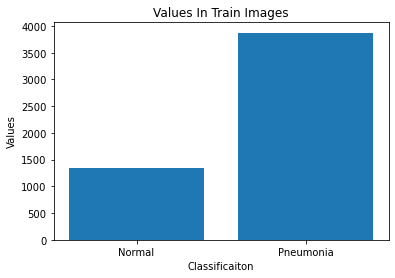

In [78]:
fig, ax = plt.subplots()
x = ['Normal', 'Pneumonia']
y = [len(train_n), len(train_p)]
ax.bar(x,y)
ax.set_title('Values In Train Images')
ax.set_xlabel('Classificaiton')
ax.set_ylabel('Values');

In [131]:
print(len(train_n))
print(len(train_p))

1341
3875


In [139]:
weight_for_0 = 3875/1341
weight_for_1 = 1

class_weight = {0: (3875/1341), 1: 1}

print(weight_for_0)
print(weight_for_1)

2.889634601043997
1


In [134]:
cb_model = models.Sequential()
cb_model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
cb_model.add(layers.Dense(1, activation='sigmoid'))

In [135]:
cb_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [145]:
result_cb = cb_model.fit(train_img,
                    train_y,
                    epochs=50,
                    callbacks=early_stopping,
                    class_weight = class_weight,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1309 - accuracy: 0.9655 - val_loss: 0.9086 - val_accuracy: 0.7740
Epoch 2/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1278 - accuracy: 0.9684 - val_loss: 1.4952 - val_accuracy: 0.7147
Epoch 3/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1316 - accuracy: 0.9651 - val_loss: 0.9530 - val_accuracy: 0.7660
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1483 - accuracy: 0.9624 - val_loss: 1.1538 - val_accuracy: 0.7468
Epoch 5/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1252 - accuracy: 0.9668 - val_loss: 1.6141 - val_accuracy: 0.6987
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.9630 - val_loss: 1.7014 - val_accuracy: 0.6907
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.9664 - val_loss: 1.2601 - val_accuracy: 0.7308
Epoch 

In [143]:
cb_results_train = cb_model.evaluate(train_img, train_y)
cb_results_val = cb_model.evaluate(val_img, val_y)

print(first_results_train)
print(first_results_val)
print(cb_results_train)
print(cb_results_val)

20/20 [==============================] - 0s 2ms/step - loss: 1.4543 - accuracy: 0.7131
[0.07425756752490997, 0.9727760553359985]
[1.0694044828414917, 0.7387820482254028]
[0.09521301090717316, 0.964148759841919]
[1.4542607069015503, 0.7131410241127014]
